# Linear Data Relationship: visualization

Main goal: 1) visualize **the first two types of number variable** and check its distribution according to the different numeric features;<br>2) get and visualize **correlation** between dfferent variables and get the strongest one.

## Step 1. Getting data ready

We use the standart dataset **planets.**<br>
First step – loading all the necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [6]:
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Let’s check all the varuable types and remove empty strings.

In [7]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [8]:
df = df.dropna()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Then we prepare a subset only with type 1 and 2 of variable **number.**

In [9]:
result = df[(df['number'] == 1) | (df['number'] == 2)]
result = result.loc[:, ['number', 'orbital_period', 'mass', 'distance']]
result.head()

,number,orbital_period,mass,distance
0,1,269.300,7.10,77.40
1,1,874.774,2.21,56.95
2,1,763.000,2.60,19.84
3,1,326.030,19.40,110.62
4,1,516.220,10.50,119.47


## Step 2. Visualizing a number variable

We use a **pairplot** for start, marking number types with different colors.

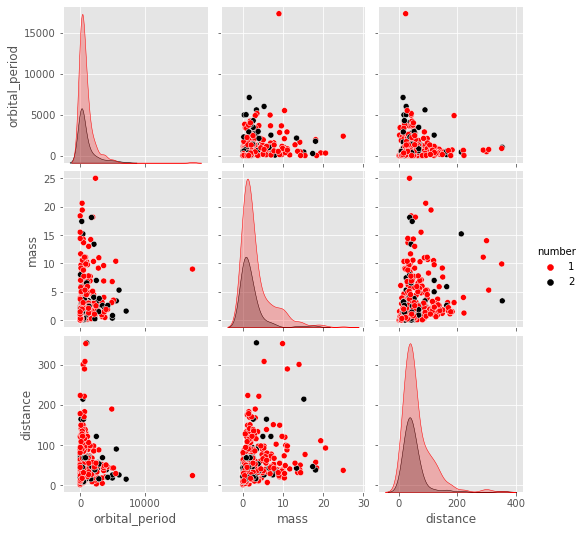

In [10]:
sns.pairplot(result, hue='number', height=2.5, kind='scatter', palette='flag')

First, we see that distribuations has too long right tails.<br>
Let’s try to center them a little bit using np.sqrt function.

In [11]:
result[['orbital_period', 'mass', 'distance']] = result[['orbital_period', 'mass', 'distance']].apply(np.sqrt)
result.head()

,number,orbital_period,mass,distance
0,1,16.410363,2.664583,8.797727
1,1,29.576579,1.486607,7.546522
2,1,27.622455,1.612452,4.454211
3,1,18.056301,4.404543,10.517604
4,1,22.720475,3.240370,10.930233


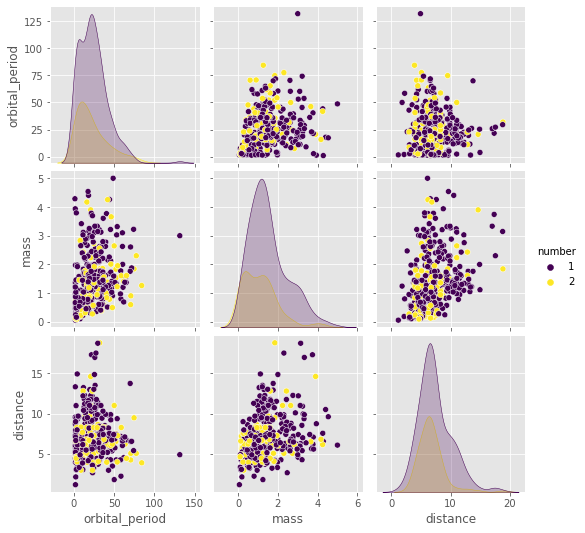

In [12]:
sns.pairplot(result, hue='number', height=2.5, kind='scatter', palette='viridis')

Now the distributions became more centralised, but all of them have some outliers.<br>
Let’s remove all the data for each column whiche lays above 99 quantile.<br>
We will change all such data to 0.

In [13]:
for column in result.columns.to_list()[1:]:
    otlr = result[column].quantile(0.99)
    result[column] = [i if i < otlr else 0 for i in result[column]]

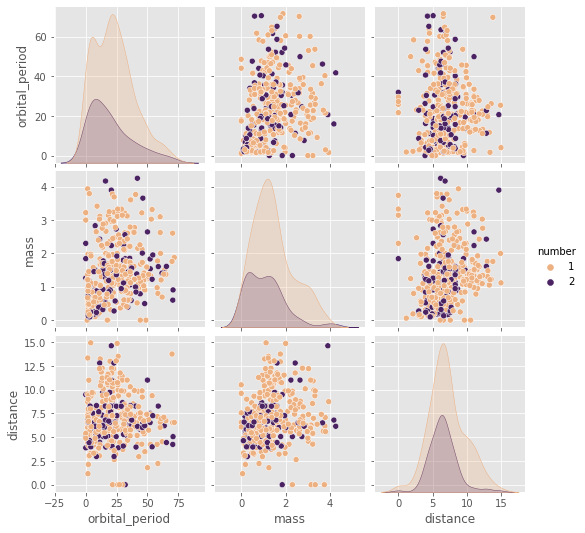

In [14]:
sns.pairplot(result, hue='number', height=2.5, kind='scatter', palette='flare')

Now dustributions have more centered look. Let’s return to number variable.

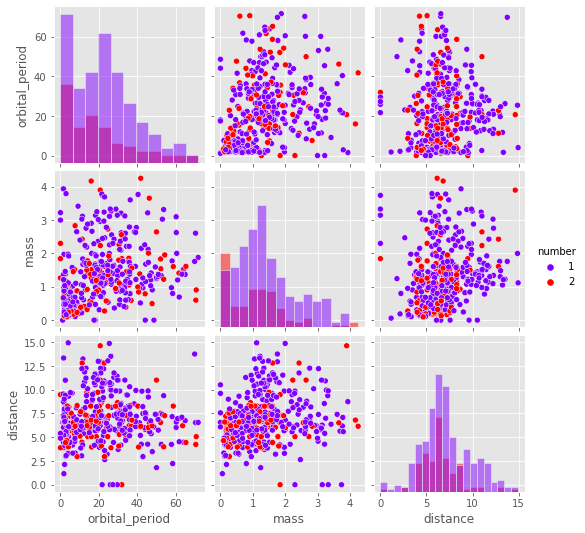

In [52]:
sns.pairplot(result, hue='number', height=2.5, diag_kind='hist', palette='rainbow')

It seems that first two types are distributed evenly in each other variables,<br>
but type 1 has much more cases (especially it’s shown on the histograms).<br>
We can give each type not only its own color but also the picture type to illustrate this<br>
and use distribution kde instead of histograms.

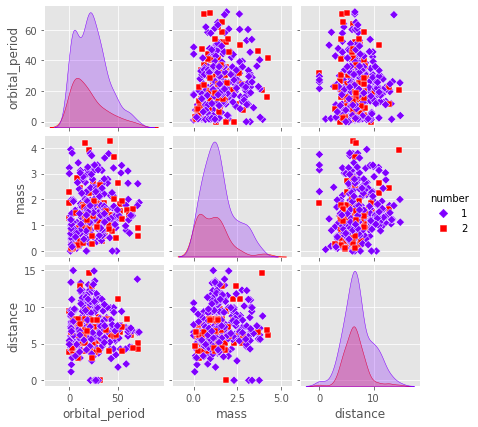

In [71]:
sns.pairplot(result, hue='number', height=2, markers=['D', 's'], palette='rainbow')

Kde pictures illustrate the prevalence of number 1 type even more, as shown on the plot below…

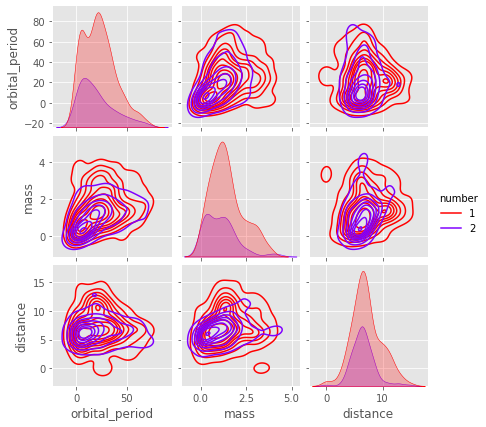

In [79]:
sns.pairplot(result, hue='number', height=2, kind='kde', palette='rainbow_r')

Or without repetitions…

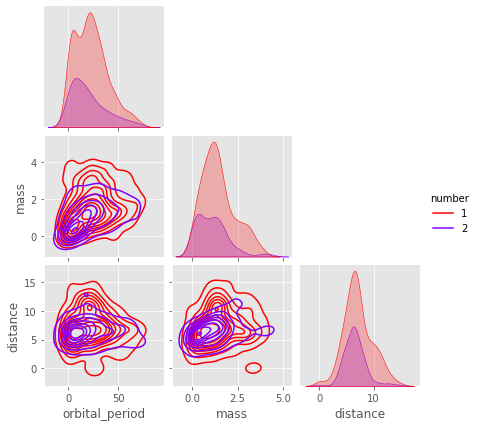

In [80]:
sns.pairplot(result, hue='number', height=2, kind='kde', palette='rainbow_r', corner=True)

Let’s check the actual differences between number types.<br>
We will also picture the amount of each type on the dataset.

Text(1.83, 106, '117')

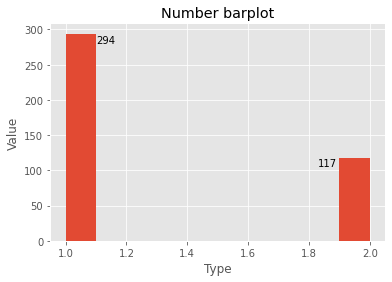

In [106]:
result.number.hist()

plt.title('Number barplot')
plt.xlabel('Type')
plt.ylabel('Value')
plt.text(1.1, 280, str(result.number.value_counts().values[0]))
plt.text(1.83, 106, str(result.number.value_counts().values[1]))

Now let’s compare distributions of these types in different numeric features.

C:\Users\Snake\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Snake\anaconda3\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


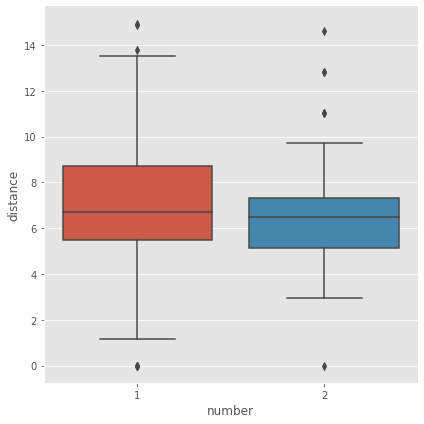

In [155]:
sns.catplot('number', 'distance', data=result, kind='box', size=6)

C:\Users\Snake\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Snake\anaconda3\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


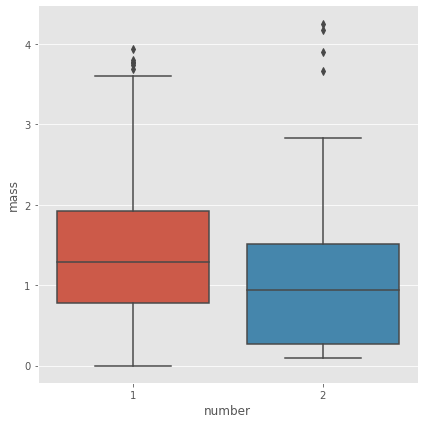

In [157]:
sns.catplot('number', 'mass', data=result, kind='box', size=6)

C:\Users\Snake\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Snake\anaconda3\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


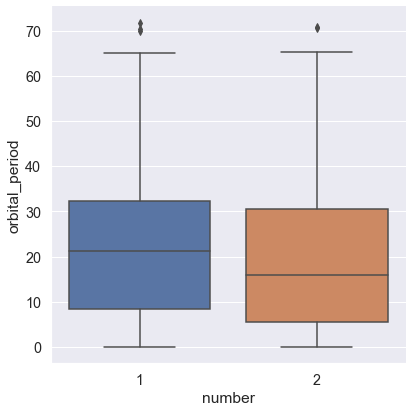

In [188]:
sns.catplot('number', 'orbital_period', data=result, kind='box', size=6)

We notice several moments:
    1) there is no significant differencies between distributions of number types in the numeric features as both means lay almost at the same level;
    2) each case still have some outliers;
    3) the most interesting case is comparing number types in mass feature (according to the means positions).
We can check the third item closely, to check, if all the data distributed evenly.

C:\Users\Snake\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Snake\anaconda3\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


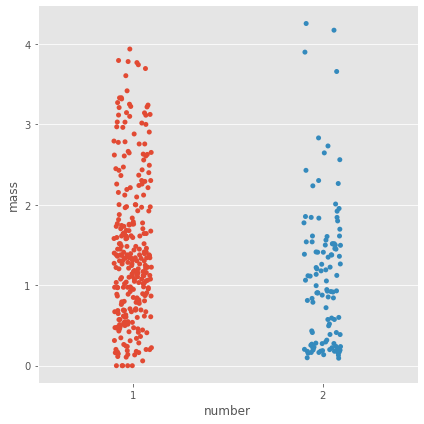

In [160]:
sns.catplot('number', 'mass', data=result, size=6)

As we see the means difference levels are influenced with the outliers in the type 2 of number feature.<br>
Thus there is also no statistically significant differencies.

## Step 3. Getting and visualizing correlation between dfferent variables

First, let’s check if converted distance feature has a normal distribution.

In [22]:
from scipy.stats import shapiro

Text(0, 0.5, 'frequency')

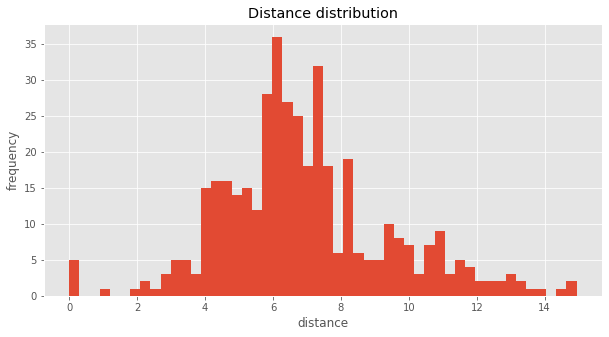

In [114]:
result.distance.hist(bins=50, figsize=(10,5))

plt.title('Distance distribution')
plt.xlabel('distance')
plt.ylabel('frequency')

Let’s take a random sample (size = 100) from this column.

In [141]:
sample = np.random.choice(result.distance.values, size=100, replace=False)

Now we can check it with Shapiro – Wilk test.

In [149]:
norm_result = shapiro(sample)
print(f'Criteria index: {norm_result.statistic};\np-value: {norm_result.pvalue}')

Criteria index: 0.9708588719367981;
p-value: 0.02572772465646267


We see that random sample has too low p-value to consider the whole feature normal.<br>
We also can check distribution of the sample.

Text(0, 0.5, 'frequency')

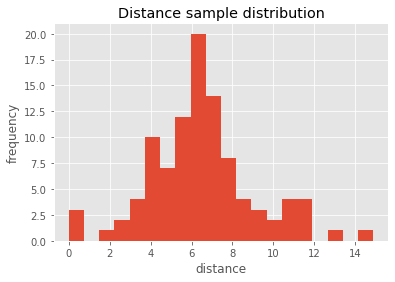

In [144]:
plt.hist(sample, bins=20)

plt.title('Distance sample distribution')
plt.xlabel('distance')
plt.ylabel('frequency')

Let’s check the basic pairplot too choose all the necessary features for correlation check.

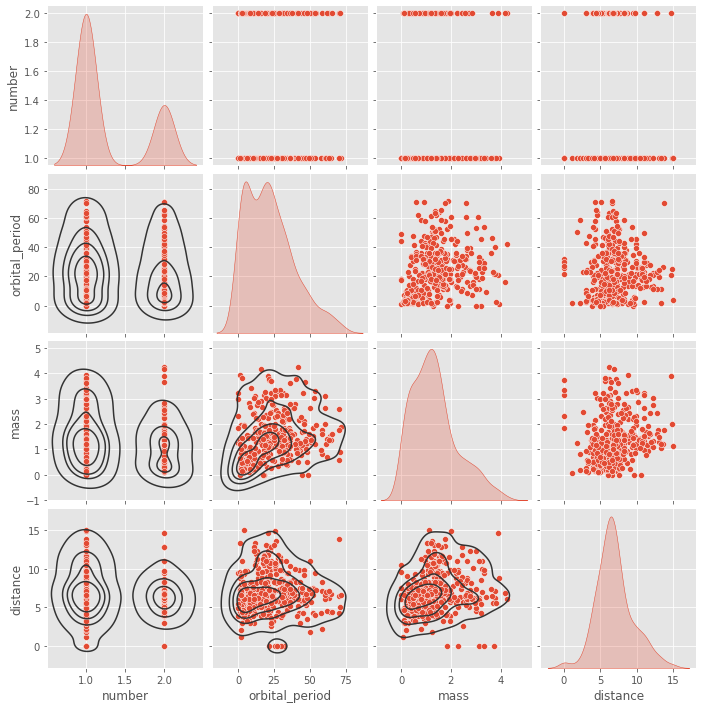

In [150]:
g = sns.pairplot(result, diag_kind='kde')
g.map_lower(sns.kdeplot, levels=5, color='.2')

We will check correlation between **distance, mass, orbital_period.**

C:\Users\Snake\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


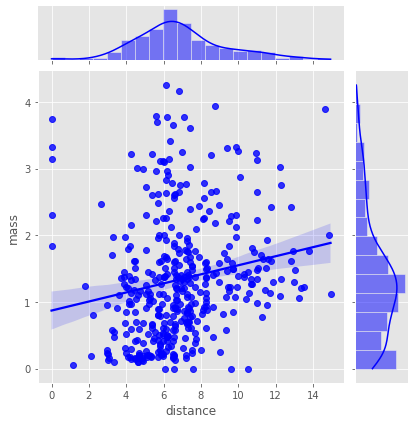

In [180]:
sns.jointplot('distance', 'mass', data=result, kind='reg', color='blue')

C:\Users\Snake\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


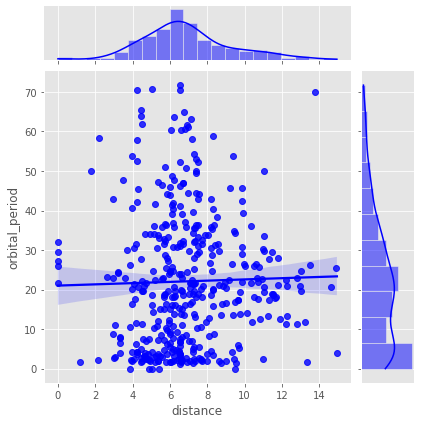

In [181]:
sns.jointplot('distance', 'orbital_period', data=result, kind='reg', color='blue')

C:\Users\Snake\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


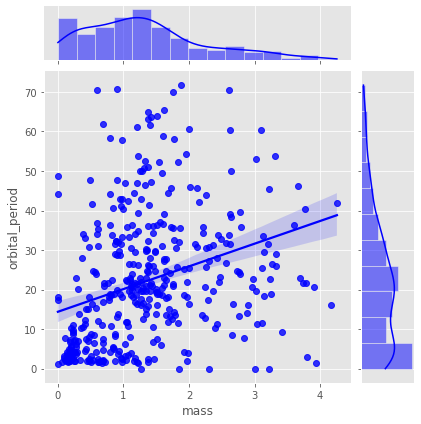

In [182]:
sns.jointplot('mass', 'orbital_period', data=result, kind='reg', color='blue')

It seems that strongest correlation is between features **mass and orbital_period.**<br>
Let’s check it with pearson correlation test.

In [183]:
result.corr(method='pearson')

,number,orbital_period,mass,distance
number,1.000000,-0.062857,-0.168379,-0.110291
orbital_period,-0.062857,1.000000,0.314175,0.023393
mass,-0.168379,0.314175,1.000000,0.186053
distance,-0.110291,0.023393,0.186053,1.000000


The strongest correlation is between mass and orbital_period indeed, but it’s not so strong.<br>
So we should check it with spearman test.

In [184]:
result.corr(method='spearman')

,number,orbital_period,mass,distance
number,1.000000,-0.083982,-0.176737,-0.109022
orbital_period,-0.083982,1.000000,0.419554,0.095104
mass,-0.176737,0.419554,1.000000,0.273539
distance,-0.109022,0.095104,0.273539,1.000000


Result is better that the previous one, but still not strong enough.<br>
It seems that all the features does not have strong linear dependence between them.<br>
We can illustrate it with a general heatmap.

<AxesSubplot:>

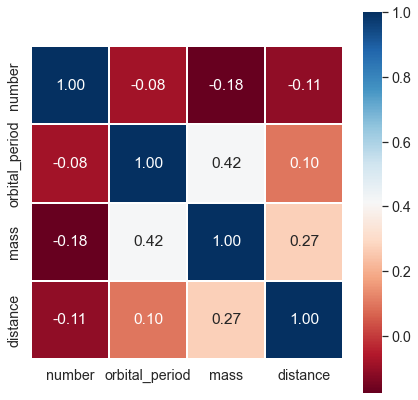

In [185]:
sns.set(font_scale=1.3)
plt.subplots(figsize=(7, 7))
sns.heatmap(result.corr(method='spearman'), square=True,
           annot=True, fmt='.2f', linewidths=0.1, cmap='RdBu')

## Result
1. The number type have many outliers but overral distributed evenly in the all features; also the first type has much more cases.
2. There is no strong linear dependence between numeric features, the strongest dependence is between **mass and orbital_period,** but it was obtained with spearman test, having just monotonic relationship.